In [5]:
# Importing required libraries.
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree #Import Decision Tree Classifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [8]:
# load dataset
df = pd.read_csv("diabetes.csv")
# Display the data
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [16]:
#Feature selection :split dataset in predictors and target variable
feature_cols = ['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = np.array(df[feature_cols]) # Predictors
y = np.array (df.Outcome) # Target variable

In [20]:
#split the train and test set using KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 615
Length of X_test is: 153
Length of y_train is: 615
Length of y_test is: 153


In [21]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train the model on the training data
model.fit(X_train,y_train) # Train Decision Tree Classifier
# Make predictions on the test set
y_pred = model.predict(X_test) #Predict the response for test dataset
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
for index in range(len(y_pred)):
 print('Actual: ', y[index], 'Predicted: ', y_pred[index])

Accuracy: 0.738562091503268
Confusion Matrix:
[[86 13]
 [27 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.50      0.57        54

    accuracy                           0.74       153
   macro avg       0.72      0.68      0.69       153
weighted avg       0.73      0.74      0.73       153

Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  1
Actual:  1 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  1
Actual:  1 Predicted:  1
Actual:  1 Predicted:  0
Actual:  1 Predicted:  0
Actual:  1 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  0 Predicted:  0
Actual:  0 Predicted:  0
Actual:  1 Predicted:  0
Actual:  1

In [23]:
# Given a Test Record: X= (Outlook=sunny, Temperature= cool,Humidity=high, Wind = strong>,What is the prediction? 0 means No, 1 means yes.
dataToPredict= np.array([[1,2,1,1,1,1,1]])
pred_new=model.predict(dataToPredict)
print(" Predicted Result: ", pred_new)

 Predicted Result:  [0]


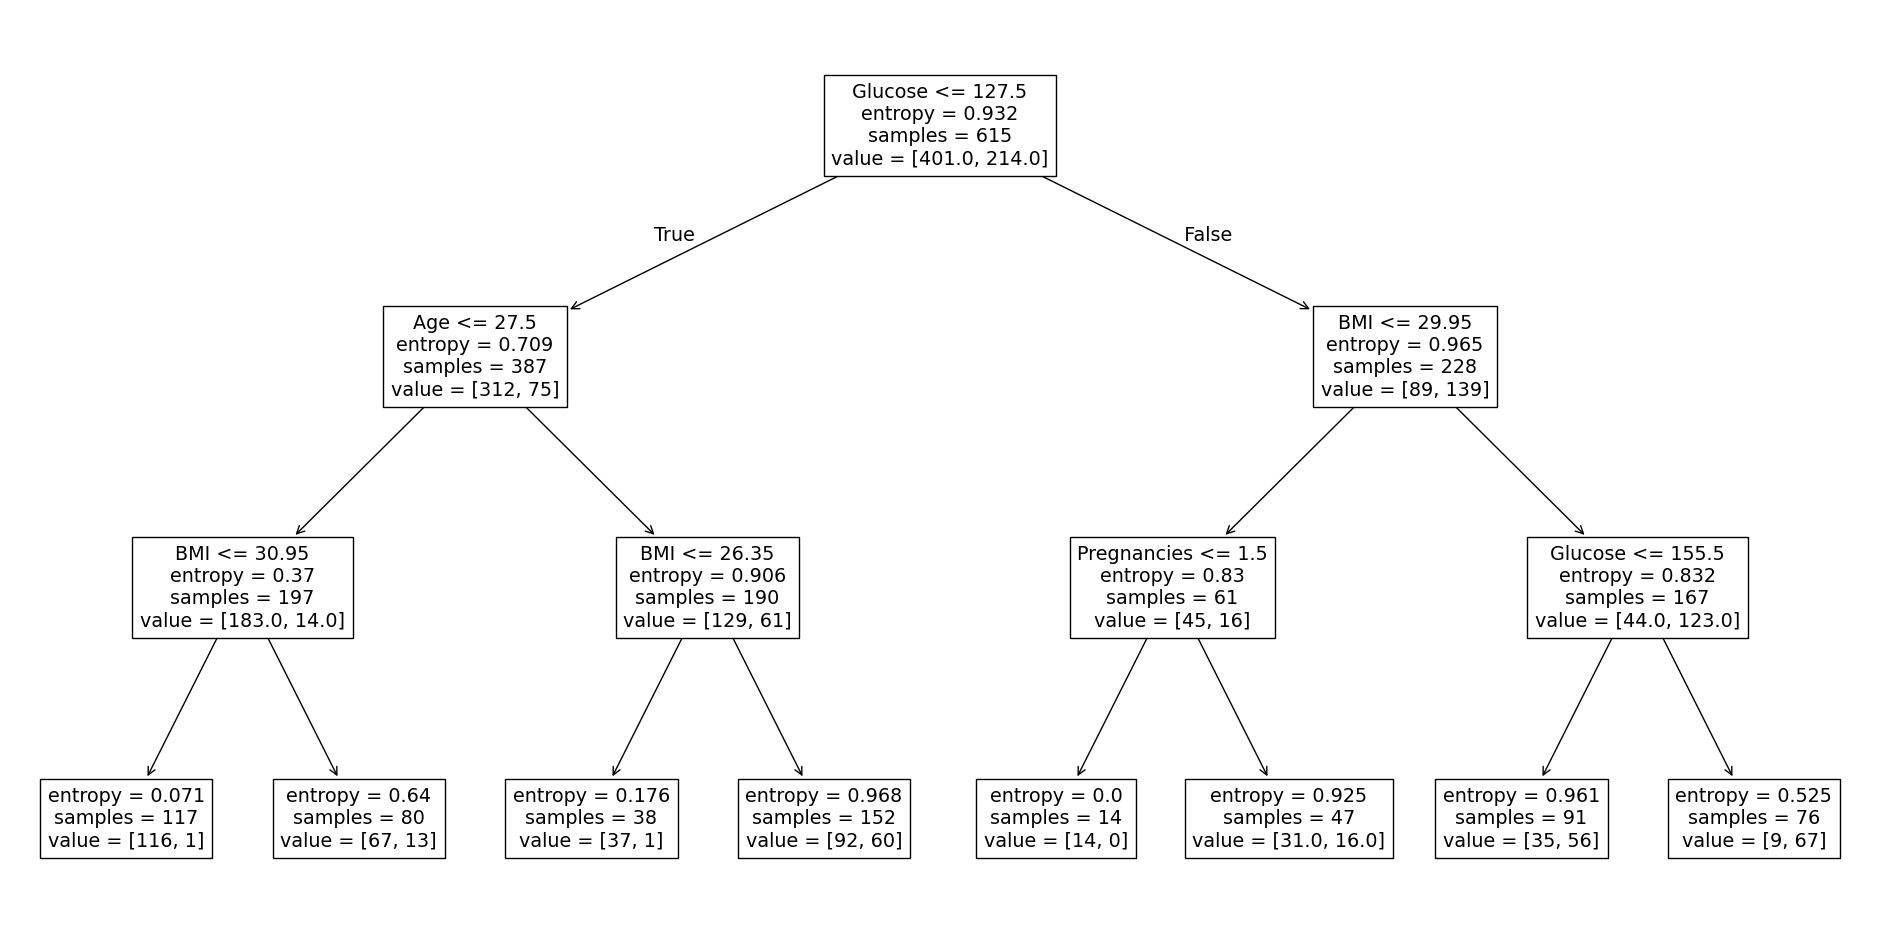

In [28]:
# Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(model, feature_names = feature_cols)
plt.show()

In [ ]:
# 5) By using K-Fold cross validation it ensures all data is used for training and testing without overfitting the data. By using multiple folds the model is trained and tested on different sets.